# Exploring Why Civil Resistance Works

We will use the [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) book, by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. We will try to replicate some of the findings.

To answer the following questions we will use the [data](https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip) from the authors.
To understand the data, read [the documentation](https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf) (in particular, Table WA.7).

## Importing necessary libraries and reading the data

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

In [2]:
data_stata = 'Data and Replication Files/WCRWreplication.dta'

data = pd.read_stata(data_stata)

## 1. Frequency of Nonviolent and Violent Campaign End Years

Created a stacked area plot showing the frequency of nonviolent and violent campaigns, for each deacade present in the dataset.

### Process
We get the decade from the end year (`eyear`), instead of the time dummies, so we can group them.
We get the number of violent and nonviolent campaigns, which we then plot on a stacked area plot.

### Results

**Important note:** The dataset contains campaigns until 2006, so the last decade only has, approximately, 6/10 of the number of campaigns, which explains the dip on the right side of the chart. We could do
\begin{equation*}
\frac{campaigns * 10}{6}
\end{equation*}
which would include some artificial data to normalise the difference. Here we will leave it as it is.

From the plot, we can clearly see that the number of campaigns is steadily increasing, but more importantly, that the number of nonviolent campaigns has increased rapidly since the 1900s. This is a major shift in the democratic processes of the countries in the latest decades. 

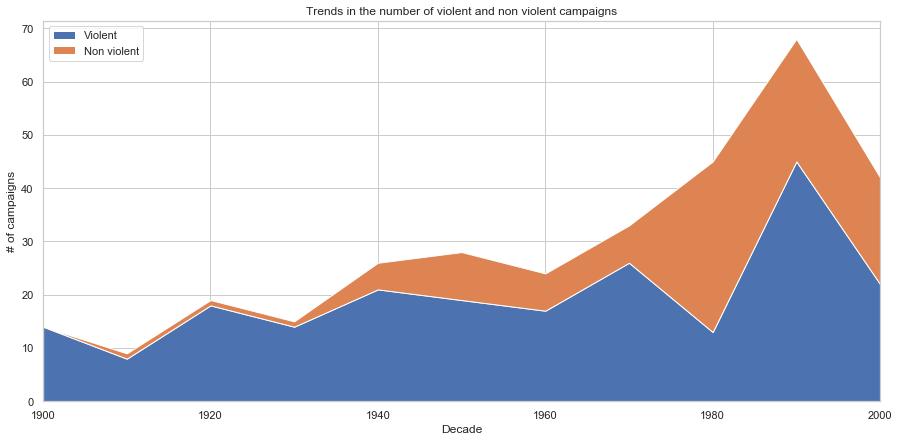

In [3]:
data['decade'] = (np.floor(data.eyear / 10) * 10).astype('int16')
nonviol_decade_group = data.groupby('decade').nonviol
non_violent_sum = nonviol_decade_group.sum()
violent_sum = nonviol_decade_group.count() - non_violent_sum

plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.stackplot(non_violent_sum.index, [violent_sum, non_violent_sum],
              labels = ['Violent', 'Non violent'])

plt.legend(loc='upper left')
plt.title('Trends in the number of violent and non violent campaigns')
plt.xlabel('Decade')
plt.xlim(1900, 2000)
_ = plt.ylabel('# of campaigns')

## 2. Number of Nonviolent Campaigns and Percentage of Success

Created a plot showing, for the decades since 1940s, the number of nonviolent campaigns and their success rates.
Used two different vertical axes.

### Process
Firstly, the data was limited to the decades after 1930s, using only nonviolent campaigns. Percentage and number of nonviolent campaigns was calculated and then plotted.

### Results
A couple of interesting observations from the plot are the major increase in the number of nonviolent campaigns in the 1980s and the steady increase of success the nonviolent campaings had, further exemplifying our hypothesis of major political and cultural shift towards democratic societies.

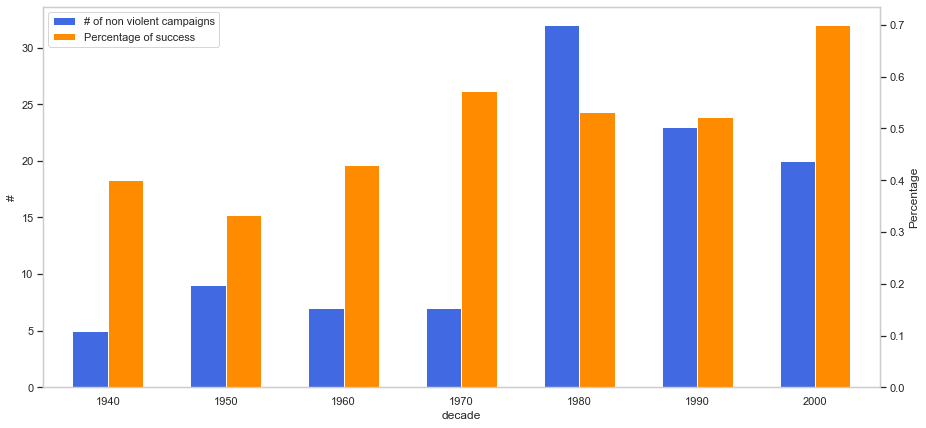

In [4]:
data_after40 = data.loc[(data['decade'] >= 1940) & (data['nonviol'] == 1)]
perc_decade_group = data_after40.groupby('decade')['success']

percentage = perc_decade_group.sum() / perc_decade_group.count()
non_violent_sum_after40 = non_violent_sum[non_violent_sum.index >= 1940]


fig = plt.figure(figsize=(15,7))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
width=0.3
plot1 = non_violent_sum_after40.plot(kind='bar', color='royalblue',
                                     ax=ax, width=width, rot='0', label = '# of non violent campaigns', position=1)
ax2 = plt.gca().twinx()
plot2 = percentage.plot(kind='bar', color='darkorange',
                        ax=ax2, label = 'Percentage of success', width=width, position=0)

ax.set_xlim(-0.55)
ax.set_ylabel('#')
ax2.set_ylabel('Percentage')

h1, l1 = plot1.get_legend_handles_labels()
h2, l2 = plot2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2)

plt.show()

## 3. Success Rate by Decade

Plotting the success rate of violent and nonviolent campaigns.

### Process
Similarly to the previous plot, we calculate the percentage of success for violent campaigns and then plot them both.

### Results
Not only do the nonviolent campaigns fare better, but the violent ones seem to face worse outcomes as the decades progress. 

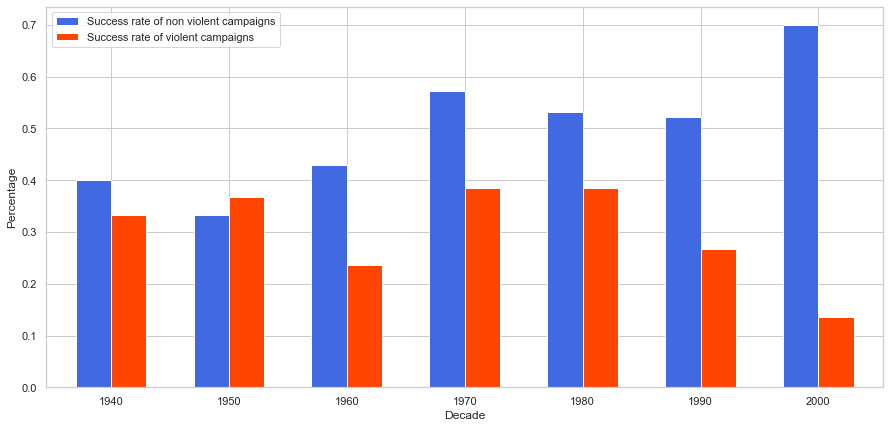

In [5]:
data_after40_viol = data.loc[(data['decade'] >= 1940) & (data['nonviol'] == 0)]

perc_decade_group = data_after40_viol.groupby('decade')['success']

percentage_viol = perc_decade_group.sum() / perc_decade_group.count()

fig = plt.figure(figsize=(15,7))
plt.rcParams["axes.grid"] = True
ax = fig.add_subplot(111)
width=0.3

percentage.plot(kind='bar', color='royalblue',
                    ax=ax, width=width, label = 'Success rate of non violent campaigns', position=1)

percentage_viol.plot(kind='bar', color='orangered',
                        ax=ax, label = 'Success rate of violent campaigns', rot='0', width=width, position=0)

ax.set_xlim(-0.55)
ax.set_ylabel('Percentage')
ax.set_xlabel('Decade')
ax.legend()

plt.show()

## 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

Let us see which are the largest resistance campaigns, by their peak membership, including basic characteristics.

### Process
Sorting the data by their peak membership and choosing basic characteristics to include.

### Results
We can see that the biggest campaign, by far, is due to the [Second Sino-Japanese War](https://en.wikipedia.org/wiki/Second_Sino-Japanese_War).

In [6]:
data_sorted = data.sort_values(by=['peakmembership'], ascending=False)
top_25 = data_sorted.iloc[:25, [2,4,3,5,7,11,16]].reset_index(drop=True)
top_25

,peakmembership,byear,eyear,location,target,viol,success
0,4500000.0,1937,1945,China,Japanese occupation,1,0
1,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,0,1
2,2000000.0,1986,1983,Philippines,Ferdinand Marcos,0,1
3,1000000.0,1988,1988,Burma,military junta,0,0
4,1000000.0,1989,1989,China,Communist regime,0,0
5,1000000.0,1967,1968,China,anti-Maoists,1,0
6,1000000.0,1922,1949,China,Kuomintang regime,1,1
7,1000000.0,2006,2006,Mexico,Calderon regime,0,0
8,1000000.0,2005,2005,Lebanon,Syrian forces,0,1
9,1000000.0,1993,1999,Nigeria,Military rule,0,1


Furthermore, we can also find a protest with Greek national interest.
It is known as the [Ανένδοτος Αγώνας](https://el.wikipedia.org/wiki/%CE%91%CE%BD%CE%AD%CE%BD%CE%B4%CE%BF%CF%84%CE%BF%CF%82_%CE%91%CE%B3%CF%8E%CE%BD%CE%B1%CF%82). Basically, George Papandreou declares the result of the 1961 elections as a product of fraud and violence, which then leads to Karamanlis' resignation from prime minister, in 1963.

In [7]:
top_25.iloc[16]

peakmembership               500000
byear                          1963
eyear                          1963
location                     Greece
target            Karamanlis regime
viol                              0
success                           1
Name: 16, dtype: object

## 5. The Effect of Participation on the Probability of Campaign Success

How does participation affect campaign success? Let us investigate by running a logistical regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends.

### Process
We drop the rows that have Nan values in the columns we will use and then run the logistic regression, using the statsmodels library, so we can analyse the result better, using the summary table.

### Results
Firstly, we can see that the `p-value` is `0`, for the `mempc` variable, which is good. The pseudo R-squared is 0.1294, so we can deduct that it is not a very good predictory model.

We can see that the coefficient of the `mempc` independent variable is 4.4892, which means that the probability of having a successful campaign, when we increase `mempc` by one unit, increases by 8,804.78%. Yes, you saw that correctly, the number is huge, but let us not forget how much a unit of `mempc` is.

In [8]:
from statsmodels.formula.api import logit
import statsmodels.api as sm

data1 = data.dropna(subset=['success', 'mempc', 'lnpop'])

model_mempc = logit("success ~ mempc + lnpop", data1).fit()

# Odds calculation
print('\nOdds increase by ', "{0:.2f}".format((np.exp(model_mempc.params[1]) - 1) * 100), '%')

model_mempc.summary()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5

Odds increase by  8804.78 %


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  163
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1294
Time:                        23:33:19   Log-Likelihood:                -96.951
converged:                       True   LL-Null:                       -111.35
Covariance Type:            nonrobust   LLR p-value:                 5.551e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8199      1.921     -3.030      0.002      -9.584      -2.055
mempc          4.4892      0.986      4.554      0.000       2.557       6.421
lnpop          0.0907      0.129      0.706      0.480      -0.161       0.343
==============================================================================
"""

### Plotting

To better visualise, we will also create a scatter plot showing the logged participants per capita and the probability of success.

#### Process
We plot the values we got from the previous regression, together with the mempc values.

#### Results
We can clearly see that the odds of a campaign being successful greatly increase, as we increase the membership per capita. In essence, we proved that if more people- per capita- participate in a campaign, the probability of that campaign succeeding increases.

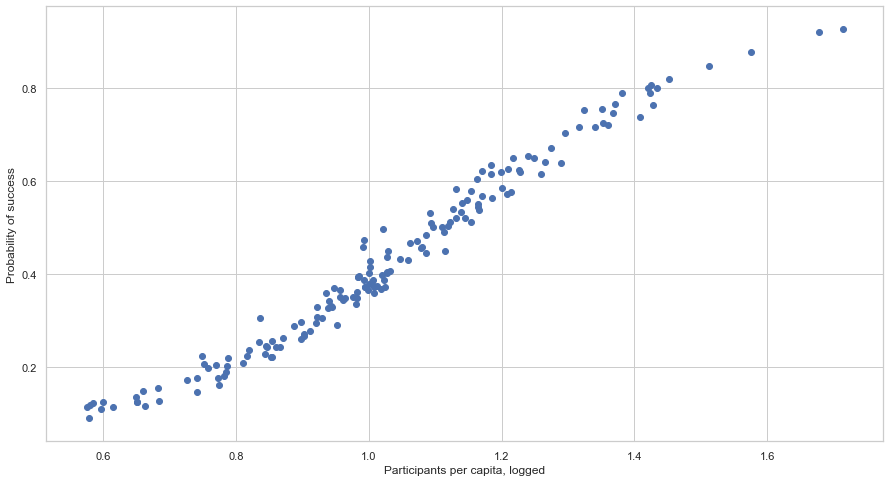

In [9]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.xlabel('Participants per capita, logged')
plt.ylabel('Probability of success')

_ = plt.scatter(data1.mempc, model_mempc.predict())

## 6. The Level of Participation Tipping Point

Let us find the tipping point of the membership of the population, for the success probability of the campaign, i.e. the membership per capita, that will make the campaign more probable to succeed than to fail.

### Process
We get the data from the previous plot, and create a regression plot, so we can see a line that has the many observations, aggregated.<br>
Afterwards, we get the points of the line and make them a DataFrame, from which we keep the ones that have as a y value, i.e. probability of success, more than 0.5.<br>
Then, we get the first observation, that is the one closer to 50% probability and plot it, along with its mempc value, which we can also see printed above the plot.

*Note*: what we get is an approximation of the necessary percentage of population. To get more accurate results we can also look at the confidence intervals and make sure the percentage of population we get will absolutely have a probability of success greater than 0.5

### Result

The result we get is `mempc = 1.1126`.

Mempc value =  1.1126


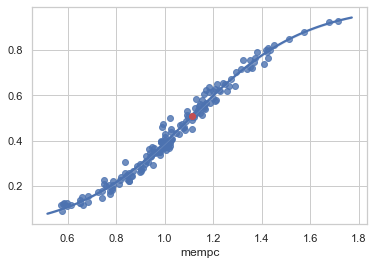

In [10]:
p = sns.regplot(x=data1.mempc, y=model_mempc.predict(), logistic=True)

x_values = p.get_lines()[0].get_xdata()
y_values = p.get_lines()[0].get_ydata()

df = pd.DataFrame(y_values.tolist(), index = x_values.tolist(), columns=['y_values'])

min_prob = 0.5

points_with_min_prob = df.loc[df.y_values > min_prob]

print('Mempc value = ', '{0:.4f}'.format(points_with_min_prob.index[0]))

_ = plt.plot(points_with_min_prob.index[0], points_with_min_prob.values[0][0], 'ro')

## 7. Nonviolent Resistance, Target Regime Type, Geographical Location

1. Examining the effect lack of violence has on the success of the campaign, even if we control for the regime type. We control for the POLITY IV score of the campaign target, the log of peakmembership, and the location’s logged population the year the campaign ends.

### Process
Fistly, we drop the rows that have Nan values in the columns we will use.
Then we run the logistic regression and get the summary.

### Results
we can see that the p-value is 0.51, for the nonviol variable, so we can accept that there is a corellation between the nonviolence and the success (ideally it would be <0.05).<br>
The pseudo R-squared is 0.1627, so we can deduct that it is not a very good predictory model too.

We can see that the coefficient of the nonviol independent variable is 0.9048, which means that the probability of having a successful campaign, when we have a nonviolent campaign, instead of a violent one, increases by 147.14%.

In [11]:
data2 = data.dropna(subset=['success', 'nonviol', 'tpolity', 'lmembers', 'lnpop'])

model_nonviol_regime = logit("success ~ nonviol + tpolity + lmembers + lnpop", data2).fit()

# Odds calculation
print('\nOdds increase by ', "{0:.2f}".format((np.exp(model_nonviol_regime.params[1]) - 1) * 100), '%')

model_nonviol_regime.summary()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6

Odds increase by  147.14 %


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  141
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            4
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1627
Time:                        23:33:23   Log-Likelihood:                -79.967
converged:                       True   LL-Null:                       -95.506
Covariance Type:            nonrobust   LLR p-value:                 2.953e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1085      1.413     -0.077      0.939      -2.878       2.661
nonviol        0.9048      0.464      1.952      0.051      -0.004       1.813
tpolity        0.0520      0.030      1.744      0.081      -0.006       0.110
lmembers       0.3751      0.128      2.926      0.003       0.124       0.626
lnpop         -0.4363      0.142     -3.067      0.002      -0.715      -0.157
==============================================================================
"""

### Plotting
Let us visualise the probabilities again.
We can see that, when the `nonviol` variable is 0 (so when the campaign is violent), the probability of success tends to be lower than when we have a nonviolent campaign.

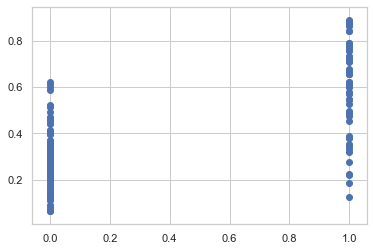

In [12]:
plt.scatter(data2.nonviol, model_nonviol_regime.predict())

2. Lastly, let us see the effect lack of violence has, on the probability of success, when we control for the location.

### Process
Fistly, we drop the rows that have Nan values in the columns we will use.
Then we run the logistic regression and get the summary.

*Note*: lccode is a categorical variable, but it has too many values for the regression to work properly (400), so we will leave it as it is.

### Results
We can see that the p-value is 0, for the nonviol variable, which is great.<br>
The pseudo R-squared is 0.06476, so this model is a bad predictor.

We can see that the coefficient of the nonviol independent variable is 1.2 (with 95% CI being [0.71, 1.69]), which means that the probability of having a successful campaign, when we have a nonviolent campaign, instead of a violent one, increases by 232.64%.

In [13]:
data3 = data.dropna(subset=['success', 'nonviol', 'lccode'])

model_nonviol_lccode = logit("success ~ nonviol + lccode", data3).fit()

# Odds calculation
print('\nOdds increase by ', "{0:.2f}".format((np.exp(model_nonviol_lccode.params[1]) - 1) * 100), '%')

model_nonviol_lccode.summary()

Optimization terminated successfully.
         Current function value: 0.603612
         Iterations 5

Odds increase by  232.64 %


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  323
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                 0.06476
Time:                        23:33:24   Log-Likelihood:                -194.97
converged:                       True   LL-Null:                       -208.47
Covariance Type:            nonrobust   LLR p-value:                 1.370e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7061      0.298     -2.372      0.018      -1.289      -0.123
nonviol        1.2019      0.251      4.790      0.000       0.710       1.694
lccode        -0.0008      0.001     -1.449      0.147      -0.002       0.000
==============================================================================
"""

### Plotting
It is very clear here, that when we control for the location of the campaign and the campaign is nonviolent, the probability of success is higher in every observation we have, than the probability of a violent campaign. Thus, location plays a major role when it comes to correlating campaign success and violence.

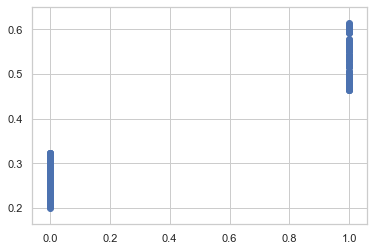

In [14]:
plt.scatter(data3.nonviol, model_nonviol_lccode.predict())